# Supervised Learning, Part 1

In [33]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
np.set_printoptions(precision=2)

In [5]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head(10)

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79
5,2,mandarin,mandarin,80,5.8,4.3,0.77
6,2,mandarin,mandarin,80,5.9,4.3,0.81
7,2,mandarin,mandarin,76,5.8,4.0,0.81
8,1,apple,braeburn,178,7.1,7.8,0.92
9,1,apple,braeburn,172,7.4,7.0,0.89


In [54]:
feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']

X_train, X_test, y_train, y_test = train_test_split(X_fruits, y_fruits, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on test set: 1.00
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  orange


In [63]:
# Without using scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

print('Accuracy of KNN classifier on the training set is: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of KNN classifier on the test set is: {:.2f}'.format(knn.score(X_test, y_test)))

example_fruit = [[5.5, 2.2, 10, 0.70]]
print('Predicted fruit type for ', example_fruit, ' is ', 
      target_names_fruits[knn.predict(example_fruit)[0]-1])

Accuracy of KNN classifier on the training set is: 0.80
Accuracy of KNN classifier on the test set is: 0.53
Predicted fruit type for  [[5.5, 2.2, 10, 0.7]]  is  mandarin


# Datasets

<IPython.core.display.Javascript object>


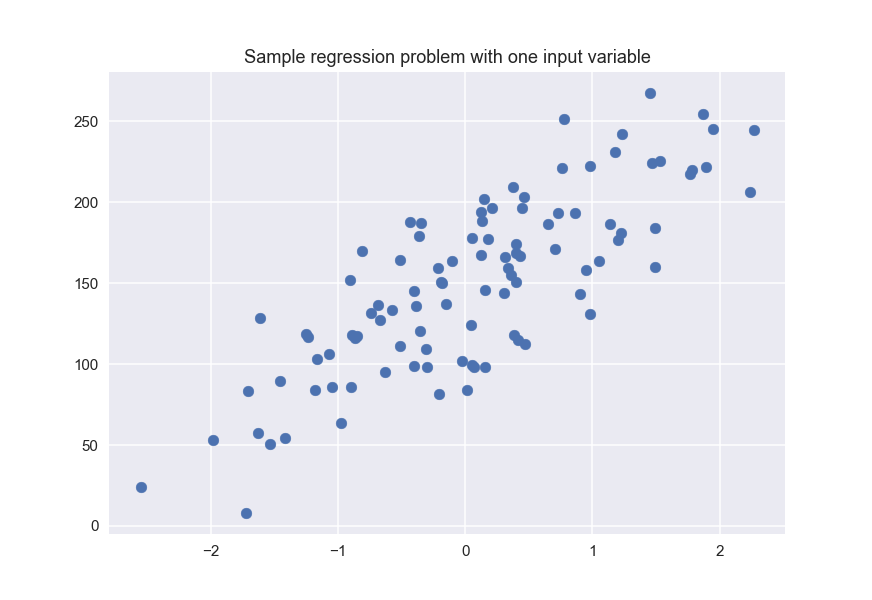

In [78]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
from adspy_shared_utilities import load_crime_dataset

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# dataset for simple regression
from sklearn.datasets import make_regression
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150, noise=30, random_state=0)
plt.scatter(X_R1, y_R1, marker='o', s=50)

<IPython.core.display.Javascript object>


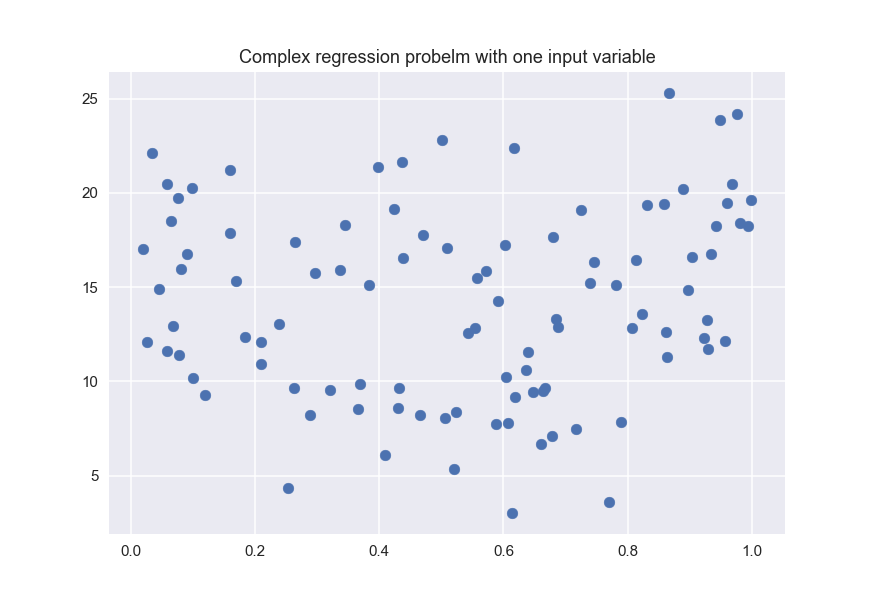

In [79]:
# Dataset for more complex regression
from sklearn.datasets import make_friedman1
plt.figure()
plt.title('Complex regression probelm with one input variable')
X_F1, y_F1 = make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_F1[:,2], y_F1, marker='o', s=50)

<IPython.core.display.Javascript object>


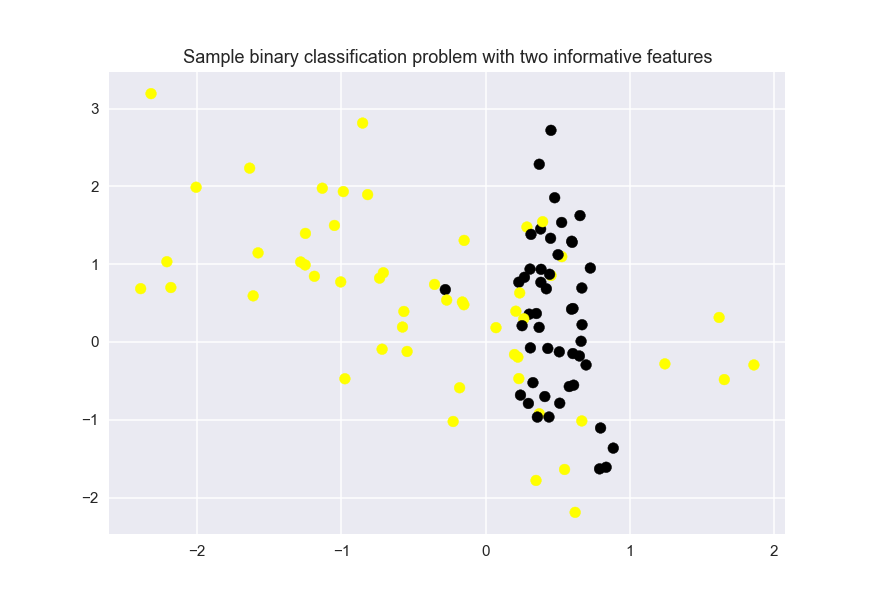

In [80]:
# Dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], c=y_C2,
           marker= 'o', s=50, cmap=cmap_bold)

<IPython.core.display.Javascript object>


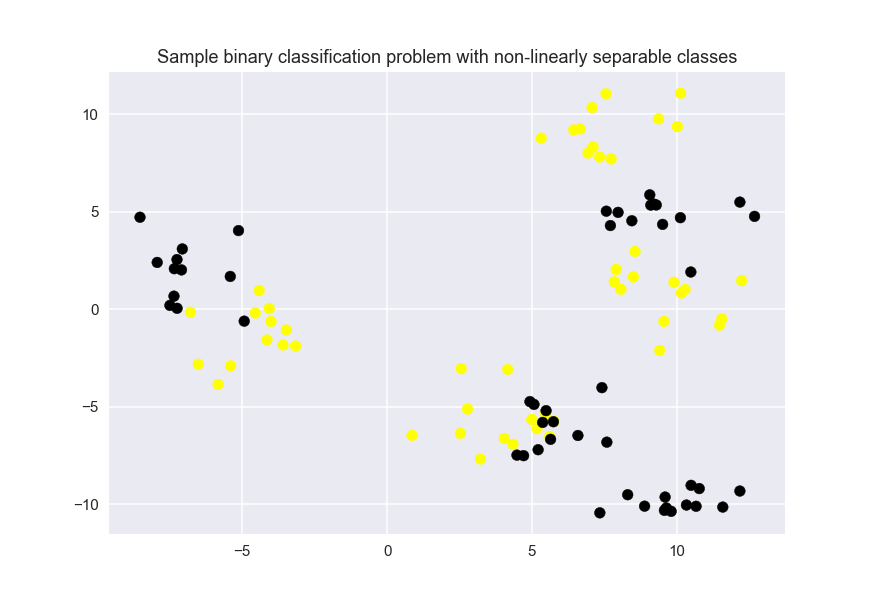

In [81]:
# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)

In [82]:
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y=True)

# Communities and Crime dataset
(X_crime, y_crime) = load_crime_dataset()

# K-Nearest Neighbors

### Classification

<IPython.core.display.Javascript object>


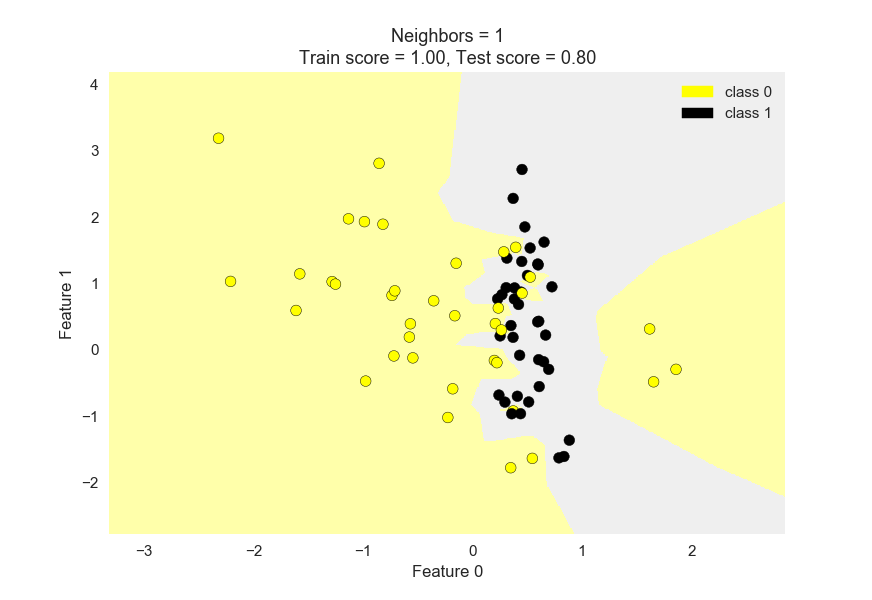

<IPython.core.display.Javascript object>


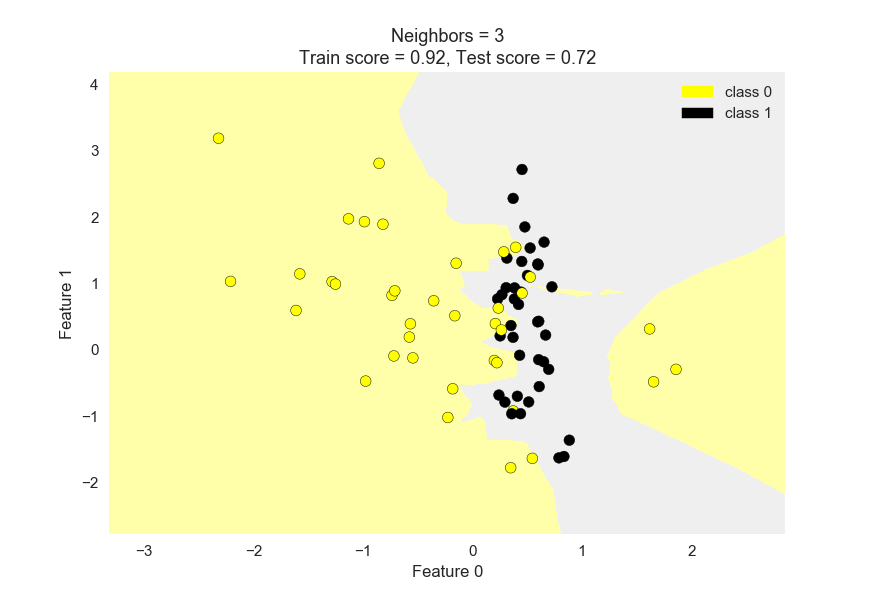

<IPython.core.display.Javascript object>


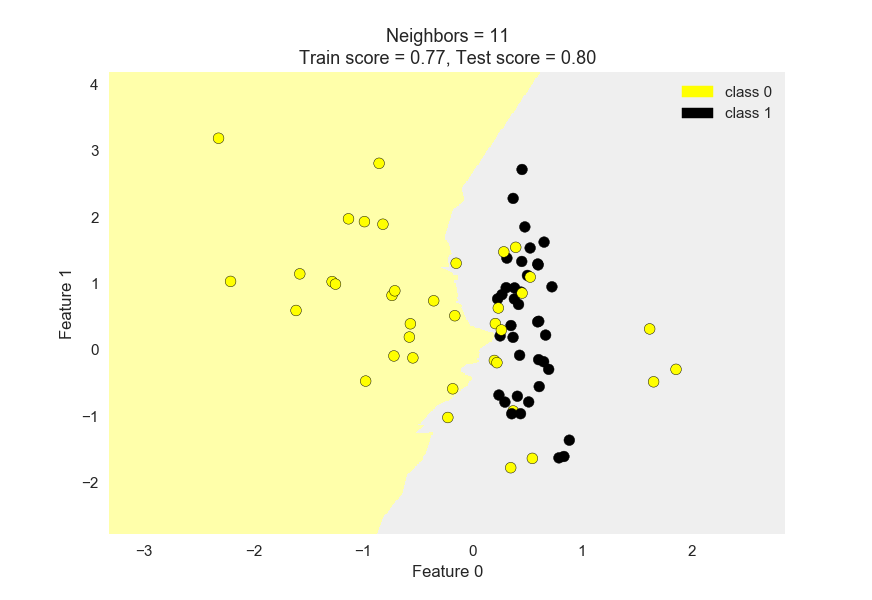

In [84]:
from adspy_shared_utilities import plot_two_class_knn

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

# Regression

In [86]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[ 231.71  148.36  150.59  150.59   72.15  166.51  141.91  235.57  208.26
  102.1   191.32  134.5   228.32  148.36  159.17  113.47  144.04  199.23
  143.19  166.51  231.71  208.26  128.02  123.14  141.91]
R-squared test score: 0.425


<IPython.core.display.Javascript object>


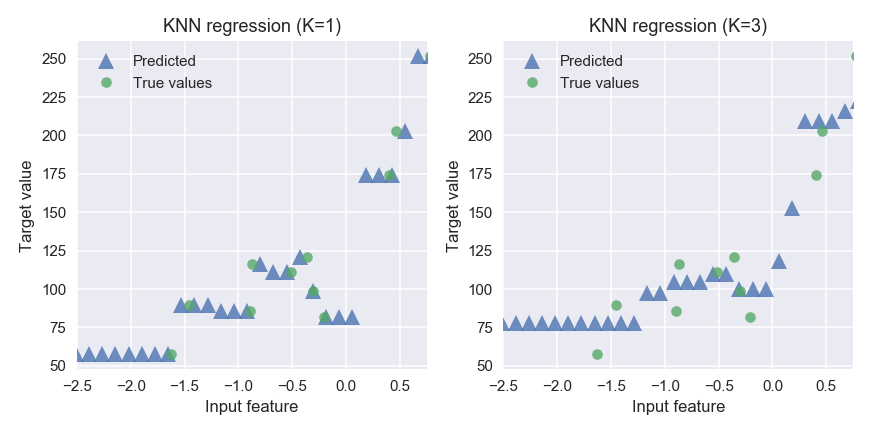

In [89]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))

X_predict_input = np.linspace(-3, 3, 50).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X_R1[0::5], y_R1[0::5], random_state=0)

for thisaxis, K in zip(subaxes, [1, 3]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    thisaxis.set_xlim([-2.5, 0.75])
    thisaxis.plot(X_predict_input, y_predict_output, '^', markersize=10, label='Predicted', alpha=0.8)
    thisaxis.plot(X_train, y_train, 'o', label='True values', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

### Regression model complexity as a function of K

<IPython.core.display.Javascript object>


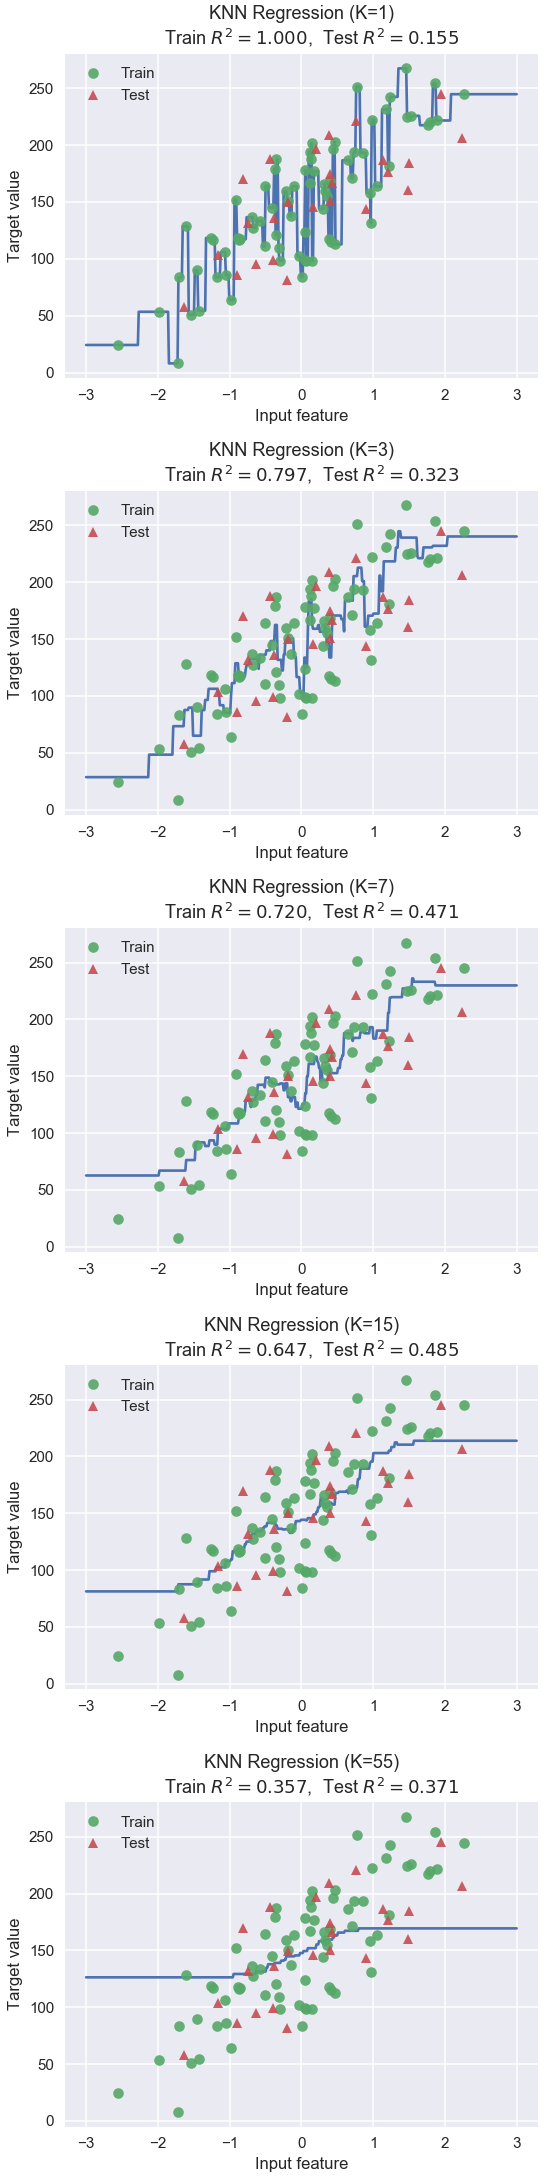

In [90]:
# Plotting KNN regression on sample dataset for different values of K
fig, subaxes = plt.subplots(5, 1, figsize=(5,20))
X_predict_input = np.linspace(-3, 3, 500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

for thisaxis, K in zip(subaxes, [1, 3, 7, 15, 55]):
    knnreg = KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output)
    thisaxis.plot(X_train, y_train, 'o', alpha=0.9, label='Train')
    thisaxis.plot(X_test, y_test, '^', alpha=0.9, label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\n\
    Train $R^2 = {:.3f}$,  Test $R^2 = {:.3f}$'
                      .format(K, train_score, test_score))
    thisaxis.legend()
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Linear models for regression

### Linear regression

In [91]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {}'.format(linreg.intercept_))
print('R-squared score for training data: {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score for training data: {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.71]
linear model intercept (b): 148.44575345658873
R-squared score for training data: 0.679
R-squared score for training data: 0.492


### Linear regression: example plot

<IPython.core.display.Javascript object>


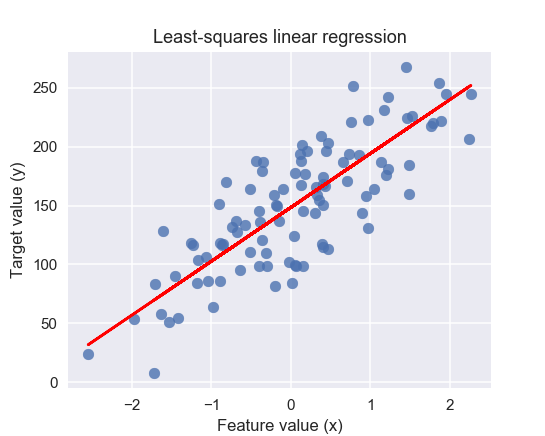

In [92]:
plt.figure(figsize=(5,4))
plt.scatter(X_R1, y_R1, marker='o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_crime, y_crime,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('Crime dataset')
print('linear model intercept: {}'
     .format(linreg.intercept_))
print('linear model coeff:\n{}'
     .format(linreg.coef_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

Crime dataset
linear model intercept: -1728.1306725811305
linear model coeff:
[  1.62e-03  -9.43e+01   1.36e+01  -3.13e+01  -8.15e-02  -1.69e+01
  -2.43e-03   1.53e+00  -1.39e-02  -7.72e+00   2.28e+01  -5.66e+00
   9.35e+00   2.07e-01  -7.43e+00   9.66e-03   4.38e-03   4.80e-03
  -4.46e+00  -1.61e+01   8.83e+00  -5.07e-01  -1.42e+00   8.18e+00
  -3.87e+00  -3.54e+00   4.49e+00   9.31e+00   1.74e+02   1.18e+01
   1.51e+02  -3.30e+02  -1.35e+02   6.95e-01  -2.38e+01   2.77e+00
   3.82e-01   4.39e+00  -1.06e+01  -4.92e-03   4.14e+01  -1.16e-03
   1.19e+00   1.75e+00  -3.68e+00   1.60e+00  -8.42e+00  -3.80e+01
   4.74e+01  -2.51e+01  -2.88e-01  -3.66e+01   1.90e+01  -4.53e+01
   6.83e+02   1.04e+02  -3.29e+02  -3.14e+01   2.74e+01   5.12e+00
   6.92e+01   1.98e-02  -6.12e-01   2.65e+01   1.01e+01  -1.59e+00
   2.24e+00   7.38e+00  -3.14e+01  -9.78e-05   5.02e-05  -3.48e-04
  -2.50e-04  -5.27e-01  -5.17e-01  -4.10e-01   1.16e-01   1.46e+00
  -3.04e-01   2.44e+00  -3.66e+01   1.41e-01   2.89

## Ridge regression